In [1]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import FinanceDataReader as fdr
from datetime import datetime
from bs4 import BeautifulSoup
from zipfile import ZipFile
from io import BytesIO

In [2]:
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 12

In [3]:
api_key = '56c7a7e9ba7366b14b82f119f8d4755318160b46'

In [4]:
date = datetime.now().date().strftime('%Y%m%d')

In [5]:
def get_corp_code(api_key, stock_code):
    corp_dict={}
    response = requests.get('https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key=' + api_key)
    zf = ZipFile(BytesIO(response.content))
    soup = BeautifulSoup(zf.open(zf.namelist()[0]).read().decode(), 'html.parser')
    for i in soup.find_all('list'):
        if i.find('stock_code').string == stock_code:
            result = i.find('corp_code').string
    
    return result

In [6]:
def get_all_rcpNo(api_key, corp_code):
    i = 0
    final_list = []
    while True:
        response = requests.get(f'https://opendart.fss.or.kr/api/list.json?crtfc_key={api_key}'
                                f"&corp_code={corp_code}"
                                f'&bgn_de=19000101'
                                f'&end_de={date}'
                                f'&page_no={i}'
                                f'&page_count=100')
        page = response.json()

        if page['status']=='013':
            print('error')
            break

        final_list += page['list']
        if page['page_no']==page['total_page']:
            break

        i+=1
        time.sleep(0.3)

    if page['status']!='013':
        temp = pd.DataFrame(final_list)
        result = list(temp[temp['report_nm'].str.contains('사업보고서 \(|반기보고서 \(|분기보고서 \(')]['rcept_no'])

    return result

In [7]:
def get_params(rcpNo, title):
    response = requests.get(f'http://dart.fss.or.kr/dsaf001/main.do?rcpNo={rcpNo}')
    soup = BeautifulSoup(response.text, 'html.parser')
    
    temp = str(soup.find('head'))\
    .split(title)[1]\
    .split('cnt++')[0]\
    .split('viewDoc(')[1]\
    .split(', ')
    
    return [temp[i][1:-1] for i in range(len(temp))]

In [8]:
temp = get_corp_code(api_key, '012860')

In [9]:
temp_ = get_all_rcpNo(api_key, temp)

In [10]:
response = requests.get(f'http://dart.fss.or.kr/dsaf001/main.do?rcpNo={temp_[0]}')
soup = BeautifulSoup(response.text, 'html.parser')

In [52]:
temp_[0]

'20200820000304'

In [11]:
params_temp = str(soup.find('head')).split('재무에 관한')[1].split('cnt++')[0].split('viewDoc(')[1].split(', ')

In [12]:
params = [params_temp[i][1:-1] for i in range(len(params_temp))]

In [13]:
response = requests.get(f'http://dart.fss.or.kr/report/viewer.do?rcpNo={params[0]}'
    f'&dcmNo={params[1]}'
    f'&eleId={params[2]}'
    f'&offset={params[3]}'
    f'&length={params[4]}'
    f'&dtd=dart3.xsd')

In [28]:
html_temp = pd.read_html(response.content)

In [29]:
len(html_temp)

378

In [57]:
html_temp[1].columns[1]

('제43기 반기', '(2020년 6월말)')

In [34]:
tttemp = {1: {'a':'가'},2: {'b':'나'},3: {'c':'다'}}

In [35]:
pd.DataFrame(tttemp)

,1,2,3
a,가,NaN,NaN
b,NaN,나,NaN
c,NaN,NaN,다


In [14]:
soup = BeautifulSoup(response.text, 'html.parser')

In [21]:
for i in soup.find_all('table'):
    print(i)

<table class="nb" width="623">
<colgroup>
<col width="623"/>
</colgroup>
<tbody>
<tr>
<td align="RIGHT" height="20" valign="BOTTOM" width="623">(단위 : 백만원)</td>
</tr>
</tbody>
</table>
<table border="1" width="625">
<colgroup>
<col width="231"/>
<col width="132"/>
<col width="131"/>
<col width="131"/>
</colgroup>
<thead>
<tr>
<th align="CENTER" height="50" rowspan="2" width="231">구분</th>
<th align="CENTER" height="20" width="132">제43기 반기</th>
<th align="CENTER" height="20" width="131">제42기</th>
<th align="CENTER" height="20" width="131">제41기</th>
</tr>
<tr>
<th align="CENTER" height="20" width="132">(2020년 6월말)</th>
<th align="CENTER" height="20" width="131">(2019년 12월말)</th>
<th align="CENTER" height="20" width="131">(2018년 12월말)</th>
</tr>
</thead>
<tbody>
<tr>
<td height="20" valign="TOP" width="231">[유동자산]</td>
<td align="RIGHT" height="20" valign="TOP" width="132">   311,549 </td>
<td align="RIGHT" height="20" valign="TOP" width="131">337,537</td>
<td align="RIGHT" height="20" vali

In [75]:
get_params(temp_[0], '재무제표 등')

IndexError: list index out of range

In [72]:
temp_ = get_all_rcpNo(api_key, temp)

In [76]:
temp_

['20200820000304',
 '20200814002721',
 '20200615000334',
 '20200330002761',
 '20191114000390',
 '20190814001296',
 '20190515001823',
 '20190401002530',
 '20200820000304',
 '20200814002721',
 '20200615000334',
 '20200330002761',
 '20191114000390',
 '20190814001296',
 '20190515001823',
 '20190401002530',
 '20181114001970',
 '20180814002084',
 '20180515001298',
 '20180402003400',
 '20171114002139',
 '20170814001421',
 '20170515003632',
 '20170331002926',
 '20161114002275',
 '20160816001780',
 '20160516002918',
 '20160330002701',
 '20151116001362',
 '20150817001530',
 '20150515002441',
 '20150331004033',
 '20141128001609',
 '20140829001310',
 '20140530001614',
 '20140331002559',
 '20131129001323',
 '20130829000959',
 '20130530000765',
 '20130401001864',
 '20121114001209',
 '20120814000870',
 '20120515000906',
 '20120330002223',
 '20111114000821',
 '20110816001716',
 '20110516001953',
 '20110331000633',
 '20101115000949',
 '20100813000901',
 '20100514001860',
 '20100331000204',
 '2009111300

In [50]:
temp

'00137234'

In [25]:
['123123']+['12323','ASDF']

['123123', '12323', 'ASDF']

In [27]:
df = pd.DataFrame(temp_['list'])

In [35]:
aa = 'dfdfdf ('

In [48]:
list(df[df['report_nm'].str.contains('사업보고서 \(|반기보고서 \(|분기보고서 \(')]['rcept_no'])

['20200820000304',
 '20200814002721',
 '20200615000334',
 '20200330002761',
 '20191114000390',
 '20190814001296',
 '20190515001823',
 '20190401002530']

In [5]:
temp = get_corp_code(api_key, '012860')

In [15]:
temp

'00137234'

In [3]:
def get_price(company_code):
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count=9999&requestType=0".format(company_code)
    get_result = requests.get(url)
    bs_obj = BeautifulSoup(get_result.content, "html.parser")
    
    inf = bs_obj.select('item')
    columns = ['Date', 'Open' ,'High', 'Low', 'Close', 'Volume']
    df_inf = pd.DataFrame([], columns = columns, index = range(len(inf)))
    
    for i in range(len(inf)):
        df_inf.iloc[i] = str(inf[i]['data']).split('|')
    
    df_inf.index = pd.to_datetime(df_inf['Date'])
    
    return df_inf.drop('Date', axis=1).astype(float)

In [4]:
kosdaq_ = get_price('kosdaq')[['Close']]/100

In [5]:
kosdaq__ = fdr.DataReader('KQ11')[['Close']]

In [6]:
kosdaq = pd.concat([kosdaq_,kosdaq__]).drop_duplicates().sort_index()

In [59]:
krx = fdr.StockListing('KRX')

In [60]:
mobase_info = krx[krx['Symbol']=='012860']

In [61]:
mobase_info

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
798,012860,KOSDAQ,모베이스전자,자동차 신품 부품 제조업,"스마트키,스위치",1994-10-26,12월,김호,http://www.mobaseelec.com,경기도


mobase = fdr.DataReader('012860')

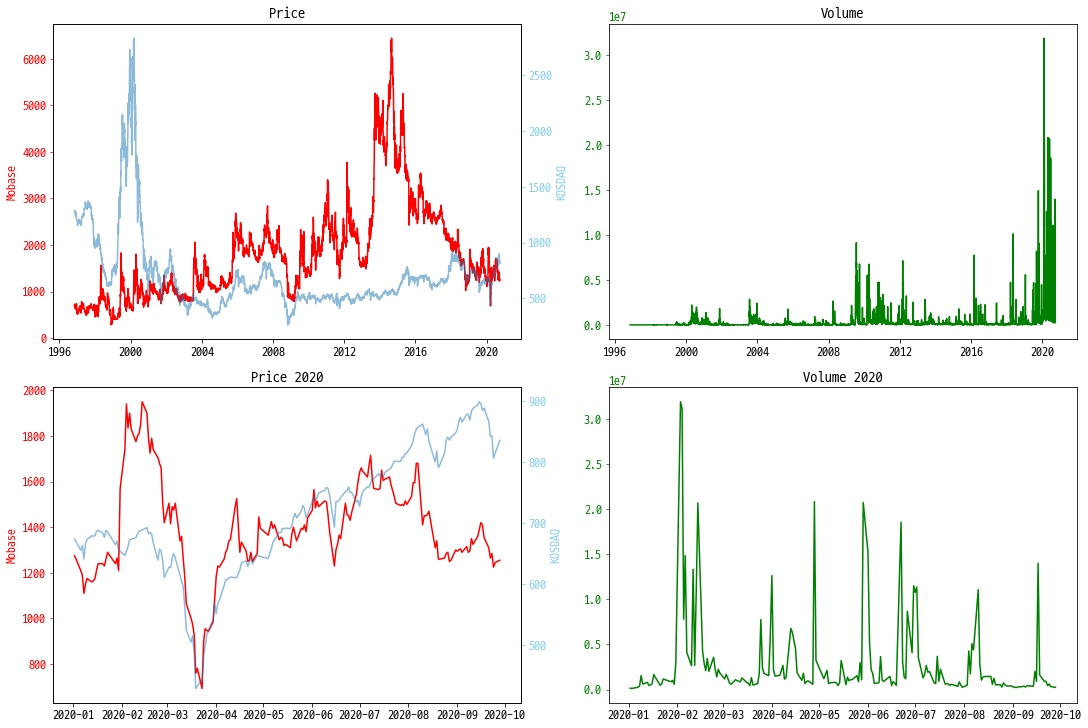

In [14]:
fig1 = plt.figure(constrained_layout=True, figsize=(15,10))
fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(2, 2)
f1_ax1 = fig1.add_subplot(gs[0, 0])
f1_ax1.set_title('Price')
f1_ax1.plot(mobase['Close'], c='red')
f1_ax1_1 = f1_ax1.twinx()
f1_ax1_1.plot(kosdaq['Close'].loc[mobase.index[0]:], alpha=0.5)
f1_ax1.set_ylabel('Mobase', c='red')
f1_ax1_1.set_ylabel('KOSDAQ', c='skyblue')
f1_ax1.tick_params(axis='y', colors='red')
f1_ax1_1.tick_params(axis='y', colors='skyblue')

f1_ax2 = fig1.add_subplot(gs[1, 0])
f1_ax2.set_title('Price 2020')
f1_ax2.plot(mobase['2020-01-01':]['Close'], c='red')
f1_ax2_1 = f1_ax2.twinx()
f1_ax2_1.plot(kosdaq['2020-01-01':]['Close'], alpha=0.5)
f1_ax2.set_ylabel('Mobase', c='red')
f1_ax2_1.set_ylabel('KOSDAQ', c='skyblue')
f1_ax2.tick_params(axis='y', colors='red')
f1_ax2_1.tick_params(axis='y', colors='skyblue')

f1_ax3 = fig1.add_subplot(gs[0, 1])
f1_ax3.set_title('Volume')
f1_ax3.plot(mobase['Volume'], c='green')
f1_ax3.tick_params(axis='y', colors='green')

f1_ax4 = fig1.add_subplot(gs[1, 1])
f1_ax4.set_title('Volume 2020')
f1_ax4.plot(mobase['2020-01-01':]['Volume'], c='green')
f1_ax4.tick_params(axis='y', colors='green')

In [11]:
krx[krx['Symbol']=='173940']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1453,173940,KOSDAQ,에프엔씨엔터,창작 및 예술관련 서비스업,"콘서트, 음반/음원",2014-12-04,12월,"안석준, 한승훈(공동대표)",http://www.fncent.com,서울특별시


In [12]:
fnc = fdr.DataReader('173940')

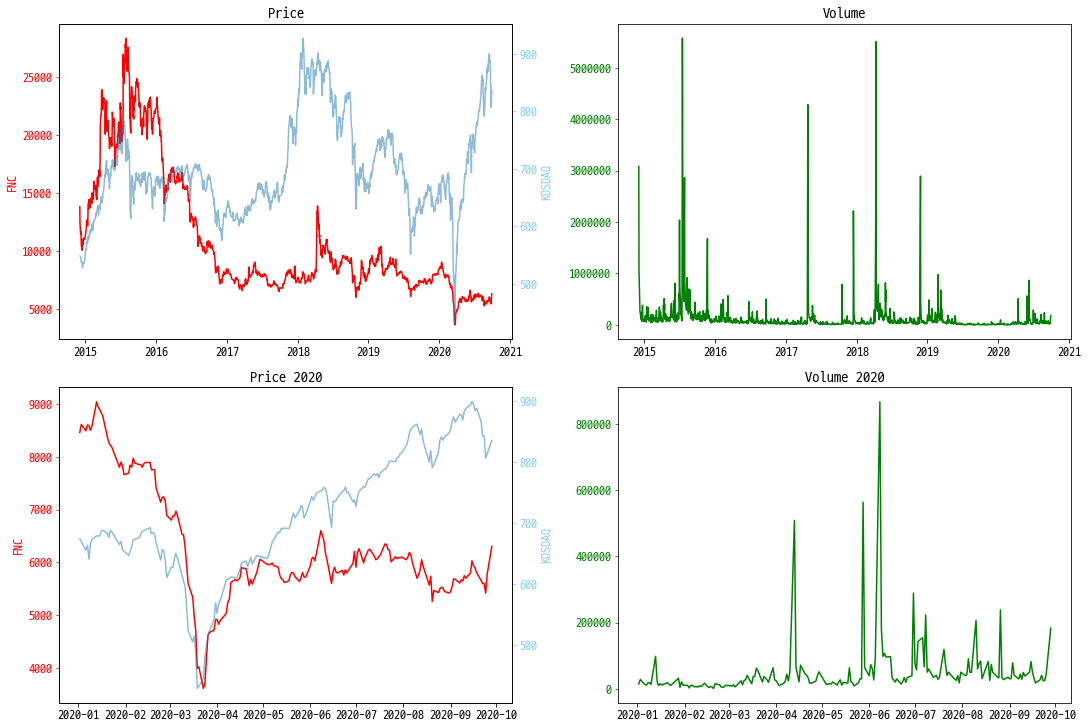

In [13]:
fig2 = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig2.add_gridspec(2, 2)
f2_ax1 = fig2.add_subplot(gs[0, 0])
f2_ax1.set_title('Price')
f2_ax1.plot(fnc['Close'], c='red')
f2_ax1_1 = f2_ax1.twinx()
f2_ax1_1.plot(kosdaq['Close'].loc[fnc.index[0]:], alpha=0.5)
f2_ax1.set_ylabel('FNC', c='red')
f2_ax1_1.set_ylabel('KOSDAQ', c='skyblue')
f2_ax1.tick_params(axis='y', colors='red')
f2_ax1_1.tick_params(axis='y', colors='skyblue')

f2_ax2 = fig2.add_subplot(gs[1, 0])
f2_ax2.set_title('Price 2020')
f2_ax2.plot(fnc['2020-01-01':]['Close'], c='red')
f2_ax2_1 = f2_ax2.twinx()
f2_ax2_1.plot(kosdaq['2020-01-01':]['Close'], alpha=0.5)
f2_ax2.set_ylabel('FNC', c='red')
f2_ax2_1.set_ylabel('KOSDAQ', c='skyblue')
f2_ax2.tick_params(axis='y', colors='red')
f2_ax2_1.tick_params(axis='y', colors='skyblue')

f2_ax3 = fig2.add_subplot(gs[0, 1])
f2_ax3.set_title('Volume')
f2_ax3.plot(fnc['Volume'], c='green')
f2_ax3.tick_params(axis='y', colors='green')

f2_ax4 = fig2.add_subplot(gs[1, 1])
f2_ax4.set_title('Volume 2020')
f2_ax4.plot(fnc['2020-01-01':]['Volume'], c='green')
f2_ax4.tick_params(axis='y', colors='green')